In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from Shrad_modules import read_nc_files, MAKEDIR
import calendar
from matplotlib import pyplot as plt
import matplotlib as mpl
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import matplotlib.gridspec as gridspec

In [2]:
lon_min, lon_max, lat_min, lat_max = -180, 180, -50, 50

In [3]:
MEAN_IMERG_FINAL = xr.open_dataset('/home/GPM/IMERG/v05/daily/final/Reordered_LTM_final_3B-DAY.MS.MRG.3IMERG.20140312-20180228.V05.nc4')
MEAN_IMERG_LATE = xr.open_dataset('/home/GPM/IMERG/v05/daily/final/LTM_late_3B-DAY.MS.MRG.3IMERG.20140312-20180228.V05.nc4')
MEAN_CHIRPS = xr.open_dataset('/home/GPM/IMERG/v05/daily/final/LTM_CHIRPS.20140312-20180228.nc')

In [4]:
LATS, LONS = MEAN_CHIRPS.lat.values, MEAN_CHIRPS.lon.values

In [5]:
DIFF1 = MEAN_IMERG_FINAL.precipitationCal.values-MEAN_IMERG_LATE.precipitationCal.values
DIFF2 = MEAN_IMERG_FINAL.precipitationCal.values-MEAN_CHIRPS.precip.values

In [ ]:
MEAN_IMERG_FINAL.

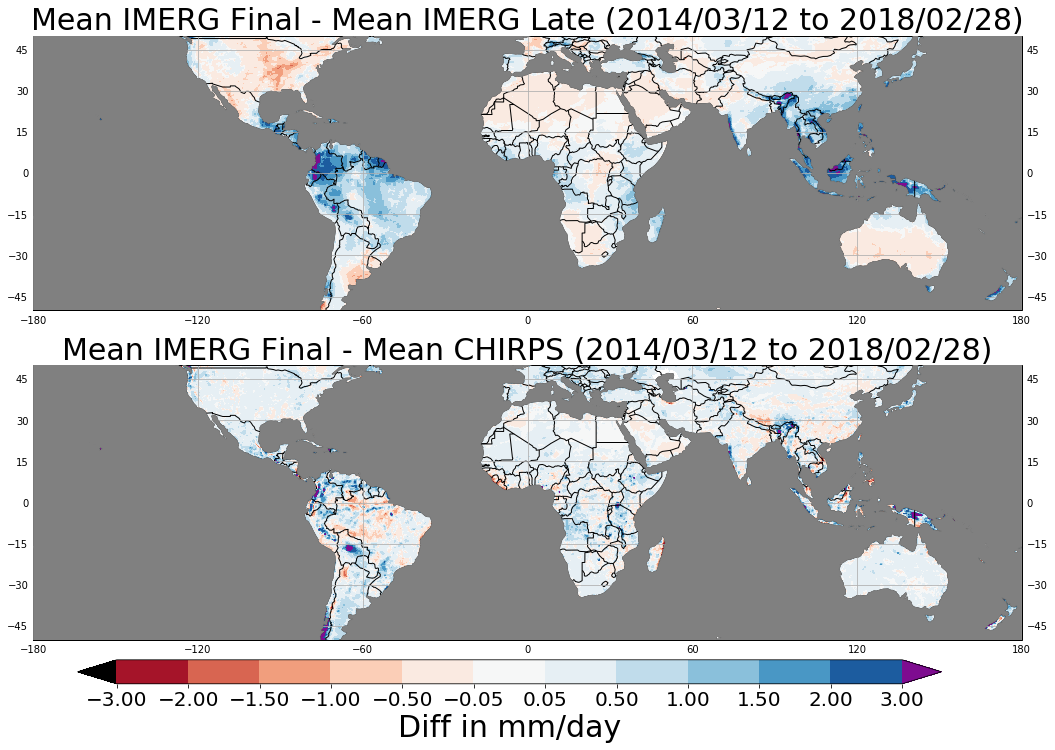

In [12]:
# Parameters for a global plot
img_extent = (lon_min, lon_max, lat_min, lat_max)
levels = [-3, -2, -1.5, -1, -0.5, -0.05, 0.05, 0.5, 1, 1.5, 2, 3]
cbar_axes = [0.2, 0.07, 0.6, 0.03]

nrows=2; ncols = 1;    
height = nrows * (lat_max - lat_min); width = ncols * (lon_max - lon_min)
figwidth = 20; figheight = (figwidth/width)*height

cmap, col_higher, col_under, extend = plt.cm.RdBu, '#7E0C90', 'black', 'both'
cmap.set_under(col_under)
cmap.set_over(col_higher)

fig=plt.figure(figsize=(figwidth, figheight))
gs = gridspec.GridSpec(nrows, ncols, wspace=0.1, hspace=0.2)

# Plotting DIFF
ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax.set_extent(img_extent, ccrs.PlateCarree())
cs = plt.contourf(LONS, LATS, DIFF1, levels, cmap=cmap, extend=extend, 
                          transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True);
plt.title('Mean IMERG Final - Mean IMERG Late (2014/03/12 to 2018/02/28)', fontsize=30)
gl.xlabels_top = False; gl.xlabels_bottom = True; gl.ylabels_right = True; gl.ylabels_left = True;
# Boundary    
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
ax.add_feature(cfeature.OCEAN, zorder=100, color='gray')

# Plotting 
ax = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax.set_extent(img_extent, ccrs.PlateCarree())
cs = plt.contourf(LONS, LATS, DIFF2, levels, cmap=cmap, extend=extend, 
                          transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True);
plt.title('Mean IMERG Final - Mean CHIRPS (2014/03/12 to 2018/02/28)', fontsize=30)
gl.xlabels_top = False; gl.xlabels_bottom = True; gl.ylabels_right = True; gl.ylabels_left = True;
# Boundary    
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
ax.add_feature(cfeature.OCEAN, zorder=100, color='gray')


# Plotting color scale
cax=fig.add_axes(cbar_axes)
cbar = fig.colorbar(cs, cax=cax, orientation='horizontal', ticks=levels)
cbar.set_label('Diff in mm/day', fontsize=30)
cbar.ax.tick_params(labelsize=20)
Figure = 'IMERG_Final_vs_IMERG_Late_and_CHIRPS.png'
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')

/home/shrad/miniconda3/envs/spy/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/shrad/miniconda3/envs/spy/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/shrad/miniconda3/envs/spy/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


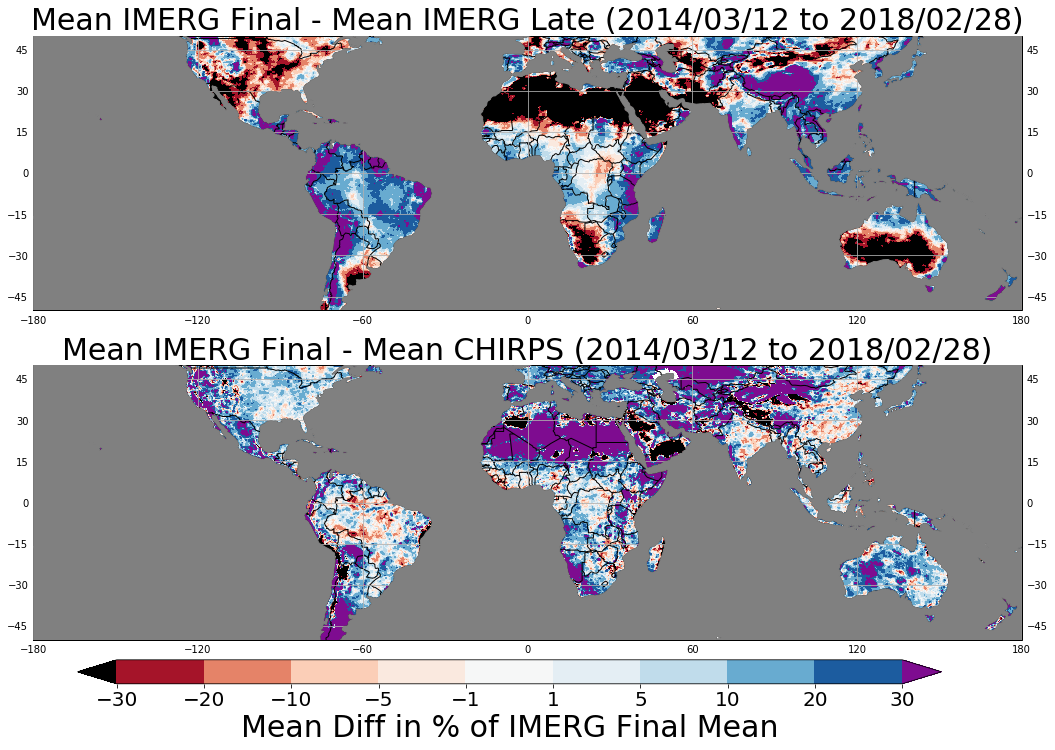

In [7]:
# Parameters for a global plot
img_extent = (lon_min, lon_max, lat_min, lat_max)
levels = [-30, -20, -10, -5, -1, 1, 5, 10, 20, 30]
cbar_axes = [0.2, 0.07, 0.6, 0.03]

nrows=2; ncols = 1;    
height = nrows * (lat_max - lat_min); width = ncols * (lon_max - lon_min)
figwidth = 20; figheight = (figwidth/width)*height

cmap, col_higher, col_under, extend = plt.cm.RdBu, '#7E0C90', 'black', 'both'
cmap.set_under(col_under)
cmap.set_over(col_higher)

fig=plt.figure(figsize=(figwidth, figheight))
gs = gridspec.GridSpec(nrows, ncols, wspace=0.1, hspace=0.2)

# Plotting DIFF
ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax.set_extent(img_extent, ccrs.PlateCarree())
cs = plt.contourf(LONS, LATS, (DIFF1/MEAN_IMERG_FINAL.precipitationCal.values)*100, levels, cmap=cmap, extend=extend, 
                          transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True);
plt.title('Mean IMERG Final - Mean IMERG Late (2014/03/12 to 2018/02/28)', fontsize=30)
gl.xlabels_top = False; gl.xlabels_bottom = True; gl.ylabels_right = True; gl.ylabels_left = True;
# Boundary    
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
ax.add_feature(cfeature.OCEAN, zorder=100, color='gray')

# Plotting 
ax = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
ax.set_extent(img_extent, ccrs.PlateCarree())
cs = plt.contourf(LONS, LATS, (DIFF2/MEAN_IMERG_FINAL.precipitationCal.values)*100, levels, cmap=cmap, extend=extend, 
                          transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True);
plt.title('Mean IMERG Final - Mean CHIRPS (2014/03/12 to 2018/02/28)', fontsize=30)
gl.xlabels_top = False; gl.xlabels_bottom = True; gl.ylabels_right = True; gl.ylabels_left = True;
# Boundary    
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=1)
ax.add_feature(cfeature.OCEAN, zorder=100, color='gray')


# Plotting color scale
cax=fig.add_axes(cbar_axes)
cbar = fig.colorbar(cs, cax=cax, orientation='horizontal', ticks=levels)
cbar.set_label('Mean Diff in % of IMERG Final Mean', fontsize=30)
cbar.ax.tick_params(labelsize=20)
Figure = 'IMERG_Final_vs_IMERG_Late_and_CHIRPS_in_Pcng_of_IMERG_mean.png'
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')

In [8]:
Figure

'IMERG_Final_vs_IMERG_Late_and_CHIRPS_in_Pcng_of_IMERG_mean.png'